In [1]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation, NMF

import pandas as pd


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
final_data_df = pd.read_csv('/content/drive/My Drive/ML project/preprocessedWithoutNans.csv')

In [6]:

final_data_df["weighted_text"]= 10*(final_data_df['cleaned_headline']+" ")+ 4*(final_data_df['cleaned_short_description']+" ")+final_data_df["cleaned_article_text"]
final_data_df.shape

(24925, 14)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data_df.drop("category", axis = 1), final_data_df['category'], test_size=0.2, random_state=42)

In [8]:

vectorizer_tf = TfidfVectorizer(max_features=5000)

tfidf_matrix = vectorizer_tf.fit_transform(X_train['weighted_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tf.get_feature_names_out())

tfidf_df.head()

,aaron,abandoned,abc,ability,able,abortion,abroad,absence,absolute,absolutely,...,york,you,young,younger,youngest,youth,youtube,zero,zika,zone
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.036956,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.014916,0.020099,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.039854,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018396,...,0.000000,0.043875,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.026866,0.043523,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.028771,0.0,0.03211,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

documents = list(X_train['weighted_text'])

vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)


In [10]:

import pickle

try:
  with open('/content/drive/My Drive/ML project/lda_model.pkl', 'rb') as f:
    lda_model = pickle.load(f)
    print("Loaded existing LDA model.")
except FileNotFoundError:
  print("LDA model not found. Training a new one.")


  lda_model = LatentDirichletAllocation(n_components=15, random_state=42)
  lda_model.fit(doc_term_matrix)

  lda_features = lda_model.transform(doc_term_matrix)

  lda_features_df = pd.DataFrame(lda_features, columns=[f'LDA-{i}' for i in range(lda_model.n_components)])

  with open('/content/drive/My Drive/ML project/lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)
    print("Saved the trained LDA model.")

Loaded existing LDA model.


In [11]:
import os

lda_features_filepath = '/content/drive/My Drive/ML project/lda_features.csv'

if os.path.exists(lda_features_filepath):
  lda_features_df = pd.read_csv(lda_features_filepath)
  print("Loaded lda_features_df from Google Drive.")
else:
  lda_features_df.to_csv(lda_features_filepath, index=False)
  print("Saved lda_features_df to Google Drive.")

Loaded lda_features_df from Google Drive.


In [12]:
lda_features_df.head()

,LDA-0,LDA-1,LDA-2,LDA-3,LDA-4,LDA-5,LDA-6,LDA-7,LDA-8,LDA-9,LDA-10,LDA-11,LDA-12,LDA-13,LDA-14
0,0.000392,0.000392,0.000392,0.000392,0.000392,0.021169,0.000392,0.064966,0.909158,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392
1,0.068998,0.000110,0.000110,0.000110,0.000110,0.000110,0.816402,0.020288,0.004742,0.088472,0.000110,0.000110,0.000110,0.000110,0.000110
2,0.340543,0.000306,0.117845,0.000306,0.000306,0.000306,0.000306,0.000306,0.000306,0.000306,0.000306,0.278811,0.019579,0.240164,0.000306
3,0.000065,0.000065,0.005089,0.038211,0.000065,0.054585,0.099810,0.516153,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.285568
4,0.000123,0.000123,0.000123,0.000123,0.000123,0.008242,0.683013,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.307272,0.000123


In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=42)
tfidf_svd = svd.fit_transform(tfidf_df)


In [15]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

def build_autoencoder():
    input_layer = Input(shape=(5000,), name='Input')

    x = Dense(2000, activation='relu')(input_layer)
    encoded = Dense(500, activation='relu', name='Encoded')(x)  # Bottleneck layer (500 features)

    x = Dense(2000, activation='relu')(encoded)
    decoded = Dense(5000, activation='sigmoid', name='Decoded')(x)  # Reconstruct original dimension

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2000)                │      10,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoded (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoded (Dense)                      │ (None, 5000)                │      10,005,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,009,500 (83.96 MB)

 Trainable params: 22,009,500 (83.96 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = autoencoder.fit(
    tfidf_df, tfidf_df,
    epochs=10,
    batch_size=2048,
    verbose=1
)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - loss: 0.2311 - mse: 0.2311
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - loss: 0.0016 - mse: 0.0016
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - loss: 2.0000e-04 - mse: 2.0000e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - loss: 2.0000e-04 - mse: 2.0000e-04


In [20]:
import os
from tensorflow.keras.models import load_model, Model

model_path = '/content/drive/My Drive/ML project/encoder_model.h5'

try:
    if os.path.exists(model_path):
        encoder = load_model(model_path)
        print("Model loaded successfully.")
    else:
        encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("Encoded").output)
        encoder.summary()

        encoder.save(model_path)
        print("Model not found. A new model has been saved.")
except Exception as e:
    print(f"An error occurred: {e}")

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2000)                │      10,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoded (Dense)                      │ (None, 500)                 │       1,000,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,002,500 (41.97 MB)

 Trainable params: 11,002,500 (41.97 MB)

 Non-trainable params: 0 (0.00 B)

Model not found. A new model has been saved.


In [21]:
encoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2000)                │      10,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoded (Dense)                      │ (None, 500)                 │       1,000,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,002,500 (41.97 MB)

 Trainable params: 11,002,500 (41.97 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
tfidf_ae = encoder.predict(tfidf_matrix)

624/624 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step


In [23]:
from sklearn.preprocessing import MinMaxScaler

svd_scaler = MinMaxScaler()
tfidf_svd_scale = svd_scaler.fit_transform(tfidf_svd)


ae_scaler = MinMaxScaler()
tfidf_ae_scale = ae_scaler.fit_transform(tfidf_ae)



In [24]:
tfidf_ae_scale

array([[0.17581853, 0.        , 0.18577103, ..., 0.19843635, 0.        ,
        0.        ],
       [0.394293  , 0.        , 0.39576805, ..., 0.39424443, 0.        ,
        0.        ],
       [0.24529433, 0.        , 0.23910801, ..., 0.25568452, 0.        ,
        0.        ],
       ...,
       [0.28993902, 0.        , 0.2793191 , ..., 0.28872204, 0.        ,
        0.        ],
       [0.15454245, 0.        , 0.15424047, ..., 0.15477216, 0.        ,
        0.        ],
       [0.3641451 , 0.        , 0.36223185, ..., 0.3702727 , 0.        ,
        0.        ]], dtype=float32)

In [25]:
tfidf_svd_scale

array([[0.22823969, 0.1308133 , 0.87380843, ..., 0.35076641, 0.53527163,
        0.511296  ],
       [0.34314701, 0.23307284, 0.27822842, ..., 0.41120957, 0.55911332,
        0.60297146],
       [0.27261286, 0.23343441, 0.35567748, ..., 0.17536939, 0.22450494,
        0.28711173],
       ...,
       [0.27531603, 0.21357363, 0.18306339, ..., 0.70124287, 0.48879799,
        0.47851924],
       [0.16329128, 0.31945841, 0.32344468, ..., 0.35522422, 0.42454951,
        0.36342262],
       [0.42224198, 0.2864317 , 0.28859574, ..., 0.28885482, 0.31431478,
        0.61087232]])

In [26]:
added_=tfidf_svd_scale+tfidf_ae_scale
tfidf_added_=pd.DataFrame(added_ , columns=["Tfid-"+str(i) for i in range(500)])

In [27]:
tfidf_added_

,Tfid-0,Tfid-1,Tfid-2,Tfid-3,Tfid-4,Tfid-5,Tfid-6,Tfid-7,Tfid-8,Tfid-9,...,Tfid-490,Tfid-491,Tfid-492,Tfid-493,Tfid-494,Tfid-495,Tfid-496,Tfid-497,Tfid-498,Tfid-499
0,0.404058,0.130813,1.059579,0.327105,0.476564,0.414980,0.808414,0.424911,0.351503,0.659974,...,0.501277,0.973146,0.593757,0.736100,0.707167,0.566800,0.537743,0.549203,0.535272,0.511296
1,0.737440,0.233073,0.673996,0.388617,0.927435,0.751708,0.720691,0.569874,0.597441,0.861569,...,0.654382,0.798549,0.802727,0.867492,0.911443,0.938541,0.910092,0.805454,0.559113,0.602971
2,0.517907,0.233434,0.594785,0.424703,0.668299,0.650260,0.687834,0.437410,0.488602,0.924858,...,0.440191,0.643188,0.808054,0.960989,1.065220,0.479518,0.894996,0.431054,0.224505,0.287112
3,0.839793,0.270519,0.792839,0.266169,0.949765,0.937754,0.883310,0.669494,0.665947,0.813896,...,0.509283,1.020331,1.065750,0.836240,1.104015,0.912068,1.005447,0.919658,0.302005,0.393029
4,1.136596,0.102538,0.687974,0.709693,0.873247,0.931941,1.081486,0.892422,0.747212,0.817117,...,0.447627,0.966064,0.916172,1.190608,1.062014,0.938828,1.077403,0.927193,0.199661,0.602140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,0.233787,0.227140,0.629752,0.347490,0.587647,0.490449,0.629153,0.384648,0.325384,0.585563,...,0.572056,0.745023,0.576883,0.571461,0.812954,0.609388,0.616132,0.809014,0.436356,0.531949
19936,0.896215,0.323627,0.757471,0.400444,0.927195,0.872679,0.746558,0.696822,0.682243,0.941576,...,0.530641,0.910162,0.765100,1.246834,0.783571,0.932568,0.920339,0.917109,0.498605,0.698884
19937,0.565255,0.213574,0.462382,0.507666,0.654161,0.585305,0.863565,0.601801,0.509983,0.663820,...,0.606631,0.766409,0.673885,0.738131,0.928192,0.631638,0.789743,0.989965,0.488798,0.478519
19938,0.317834,0.319458,0.477685,0.244260,0.683476,0.774852,0.780734,0.371015,0.340209,0.677926,...,0.578572,0.583342,0.696139,0.669474,0.693022,0.543867,0.630224,0.509996,0.424550,0.363423


In [28]:
tfidf_added_['id'] = X_train['Index_Column'].values
lda_features_df['id'] = X_train['Index_Column'].values

final_features_df = pd.merge(tfidf_added_, lda_features_df, on='id', how='left')

final_features_df.head()



,Tfid-0,Tfid-1,Tfid-2,Tfid-3,Tfid-4,Tfid-5,Tfid-6,Tfid-7,Tfid-8,Tfid-9,...,LDA-5,LDA-6,LDA-7,LDA-8,LDA-9,LDA-10,LDA-11,LDA-12,LDA-13,LDA-14
0,0.404058,0.130813,1.059579,0.327105,0.476564,0.414980,0.808414,0.424911,0.351503,0.659974,...,0.021169,0.000392,0.064966,0.909158,0.000392,0.000392,0.000392,0.000392,0.000392,0.000392
1,0.737440,0.233073,0.673996,0.388617,0.927435,0.751708,0.720691,0.569874,0.597441,0.861569,...,0.000110,0.816402,0.020288,0.004742,0.088472,0.000110,0.000110,0.000110,0.000110,0.000110
2,0.517907,0.233434,0.594785,0.424703,0.668299,0.650260,0.687834,0.437410,0.488602,0.924858,...,0.000306,0.000306,0.000306,0.000306,0.000306,0.000306,0.278811,0.019579,0.240164,0.000306
3,0.839793,0.270519,0.792839,0.266169,0.949765,0.937754,0.883310,0.669494,0.665947,0.813896,...,0.054585,0.099810,0.516153,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.285568
4,1.136596,0.102538,0.687974,0.709693,0.873247,0.931941,1.081486,0.892422,0.747212,0.817117,...,0.008242,0.683013,0.000123,0.000123,0.000123,0.000123,0.000123,0.000123,0.307272,0.000123


In [29]:
def generate_final_features(X, tfidf_transform, lda_transform, encoder, cnt_vectorizer, svd, svd_scaler, ae_scaler):
  tfidf = tfidf_transform.transform(X['weighted_text'])
  tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_transform.get_feature_names_out())
  tfidf_svd = svd.transform(tfidf_df)
  tfidf_ae = encoder.predict(tfidf)
  tfidf_svd_scale = svd_scaler.transform(tfidf_svd)
  tfidf_ae_scale = ae_scaler.transform(tfidf_ae)
  added_=tfidf_svd_scale+tfidf_ae_scale
  tfidf_added_=pd.DataFrame(added_ , columns=["Tfid-"+str(i) for i in range(500)])
  tfidf_added_['id'] = X['Index_Column'].values

  doc_term_matrix = cnt_vectorizer.transform(list(X['weighted_text']))
  lda_features = lda_transform.transform(doc_term_matrix)
  lda_features_df = pd.DataFrame(lda_features, columns=[f'LDA-{i}' for i in range(lda_transform.n_components)])
  lda_features_df['id'] = X['Index_Column'].values
  final_features_df = pd.merge(tfidf_added_, lda_features_df, on='id', how='left')

  return final_features_df


final_features_df_test = generate_final_features(X_test, vectorizer_tf, lda_model, encoder, vectorizer, svd, svd_scaler, ae_scaler)

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step


In [30]:
final_features_df_test.head()


,Tfid-0,Tfid-1,Tfid-2,Tfid-3,Tfid-4,Tfid-5,Tfid-6,Tfid-7,Tfid-8,Tfid-9,...,LDA-5,LDA-6,LDA-7,LDA-8,LDA-9,LDA-10,LDA-11,LDA-12,LDA-13,LDA-14
0,0.433621,0.229434,0.463428,0.402480,0.855892,0.441329,0.780907,0.322320,0.583083,0.872416,...,0.000131,0.135857,0.000131,0.005393,0.000131,0.000131,0.000131,0.685160,0.167313,0.000131
1,0.414941,0.199321,0.889628,0.316338,0.513508,0.501295,0.749625,0.460875,0.420308,0.825191,...,0.000284,0.000284,0.000284,0.000284,0.009492,0.000284,0.000284,0.000284,0.000284,0.000284
2,0.424186,0.216847,0.476961,0.450134,0.741202,0.625486,0.738723,0.461031,0.484760,0.769363,...,0.043182,0.415214,0.000206,0.000206,0.009935,0.000206,0.000206,0.323075,0.075768,0.000206
3,1.118085,0.250794,0.725358,0.315219,0.914976,0.938653,0.907460,0.591958,0.661383,1.071203,...,0.000114,0.637550,0.038137,0.000114,0.000114,0.000114,0.000114,0.090333,0.000114,0.000114
4,0.649124,0.317024,0.550026,0.250778,0.693150,0.787071,0.704861,0.433112,0.454162,0.797207,...,0.000169,0.413536,0.000169,0.000169,0.000169,0.163018,0.000169,0.000169,0.030658,0.000169


In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [34]:
pip install lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [36]:

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns



X_train = final_features_df.drop('id', axis=1)
X_test = final_features_df_test.drop('id', axis=1)

label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train)

Y_test_encoded = label_encoder.transform(Y_test)

models = {
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Extra Trees': ExtraTreesClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train_encoded)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test_encoded, y_pred)

    precision = precision_score(Y_test_encoded, y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test_encoded, y_pred, average='macro', zero_division=0)
    f1 = f1_score(Y_test_encoded, y_pred, average='macro', zero_division=0)

    results[model_name] = {
        'Prediction': y_pred,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy'] * 100:.2f}%")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1-Score: {result['F1-Score']:.2f}\n")

metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['Accuracy'] for result in results.values()],
    'Precision': [result['Precision'] for result in results.values()],
    'Recall': [result['Recall'] for result in results.values()],
    'F1-Score': [result['F1-Score'] for result in results.values()]
})

print(metrics_df)


Training SVC...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training KNN...
Training ANN...
Training Naive Bayes...
Training Extra Trees...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 131325
[LightGBM] [Info] Number of data points in the train set: 19940, number of used features: 515
[LightGBM] [Info] Start training from score -2.822985
[LightGBM] [Info] Start training from score -2.886568
[LightGBM] [Info] Start training from score -2.747431
[LightGBM] [Info] Start training from score -2.728058
[LightGBM] [Info] Start training from score -2.565501
[LightGBM] [Info] Start training from score -2.825520
[LightGBM] [Info] Start training from score -2.680841
[LightGBM] [Info] Start training from score -2.690403
[LightGBM] [Info] Start training from score -2.685243
[

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: SVC
Accuracy: 73.28%
Precision: 0.73
Recall: 0.72
F1-Score: 0.72

Model: Logistic Regression
Accuracy: 75.35%
Precision: 0.75
Recall: 0.75
F1-Score: 0.75

Model: Decision Tree
Accuracy: 53.66%
Precision: 0.53
Recall: 0.53
F1-Score: 0.53

Model: Random Forest
Accuracy: 69.45%
Precision: 0.69
Recall: 0.69
F1-Score: 0.69

Model: XGBoost
Accuracy: 73.50%
Precision: 0.73
Recall: 0.73
F1-Score: 0.73

Model: KNN
Accuracy: 54.10%
Precision: 0.55
Recall: 0.53
F1-Score: 0.54

Model: ANN
Accuracy: 72.84%
Precision: 0.74
Recall: 0.72
F1-Score: 0.72

Model: Naive Bayes
Accuracy: 27.38%
Precision: 0.36
Recall: 0.27
F1-Score: 0.24

Model: Extra Trees
Accuracy: 67.78%
Precision: 0.67
Recall: 0.67
F1-Score: 0.67

Model: LightGBM
Accuracy: 73.16%
Precision: 0.73
Recall: 0.72
F1-Score: 0.73

Model: CatBoost
Accuracy: 73.50%
Precision: 0.73
Recall: 0.73
F1-Score: 0.73

Model: AdaBoost
Accuracy: 51.55%
Precision: 0.50
Recall: 0.50
F1-Score: 0.49

                  Model  Accuracy  Precision    Recal

In [43]:
import joblib

model_save_path = '/content/drive/My Drive/ML project/models/'
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)
for model_name, model in models.items():

    model_filename = os.path.join(model_save_path, f"{model_name}_model.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {model_name} model at {model_filename}")


Saved SVC model at /content/drive/My Drive/ML project/models/SVC_model.joblib
Saved Logistic Regression model at /content/drive/My Drive/ML project/models/Logistic Regression_model.joblib
Saved Decision Tree model at /content/drive/My Drive/ML project/models/Decision Tree_model.joblib
Saved Random Forest model at /content/drive/My Drive/ML project/models/Random Forest_model.joblib
Saved XGBoost model at /content/drive/My Drive/ML project/models/XGBoost_model.joblib
Saved KNN model at /content/drive/My Drive/ML project/models/KNN_model.joblib
Saved ANN model at /content/drive/My Drive/ML project/models/ANN_model.joblib
Saved Naive Bayes model at /content/drive/My Drive/ML project/models/Naive Bayes_model.joblib
Saved Extra Trees model at /content/drive/My Drive/ML project/models/Extra Trees_model.joblib
Saved LightGBM model at /content/drive/My Drive/ML project/models/LightGBM_model.joblib
Saved CatBoost model at /content/drive/My Drive/ML project/models/CatBoost_model.joblib
Saved AdaB

Confusion Matrix for SVC


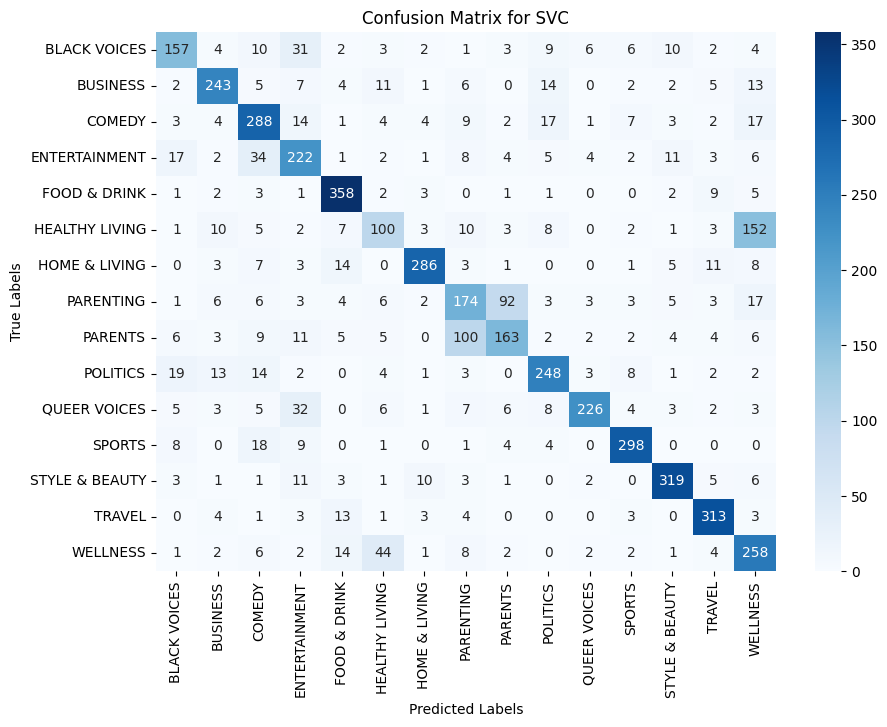

Confusion Matrix for Logistic Regression


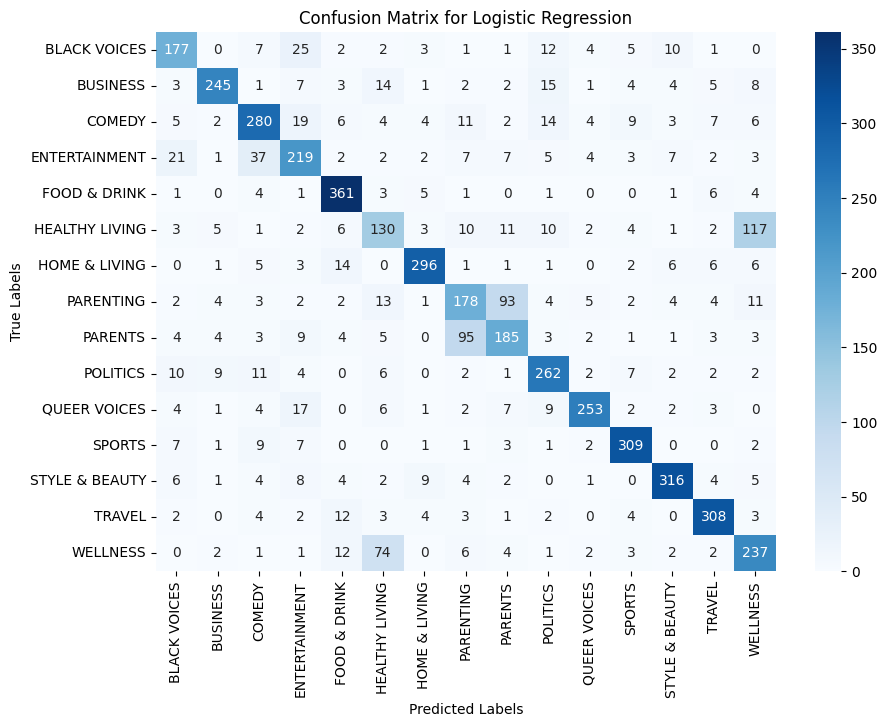

Confusion Matrix for Decision Tree


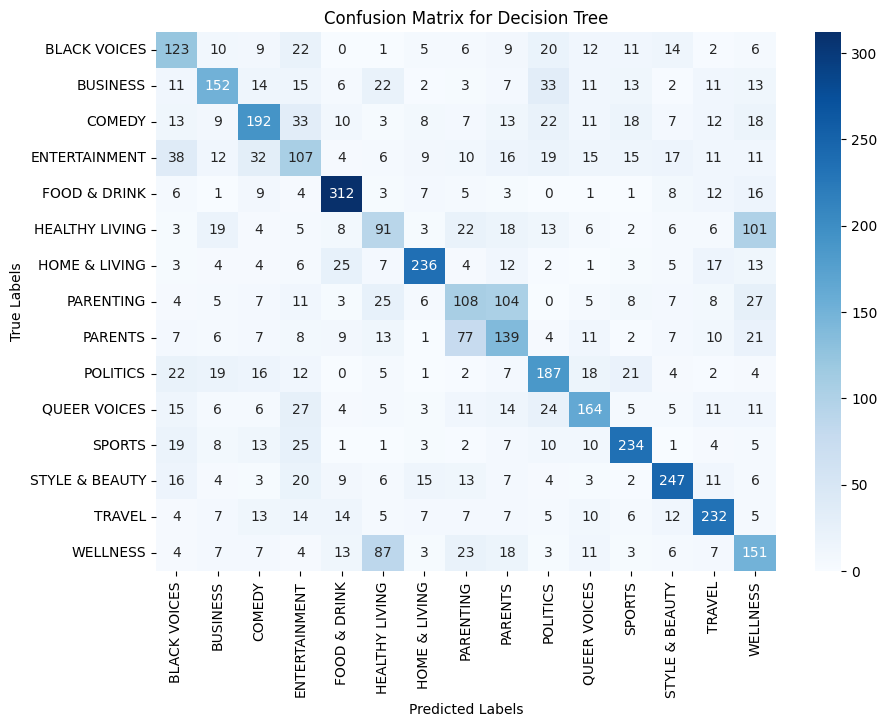

Confusion Matrix for Random Forest


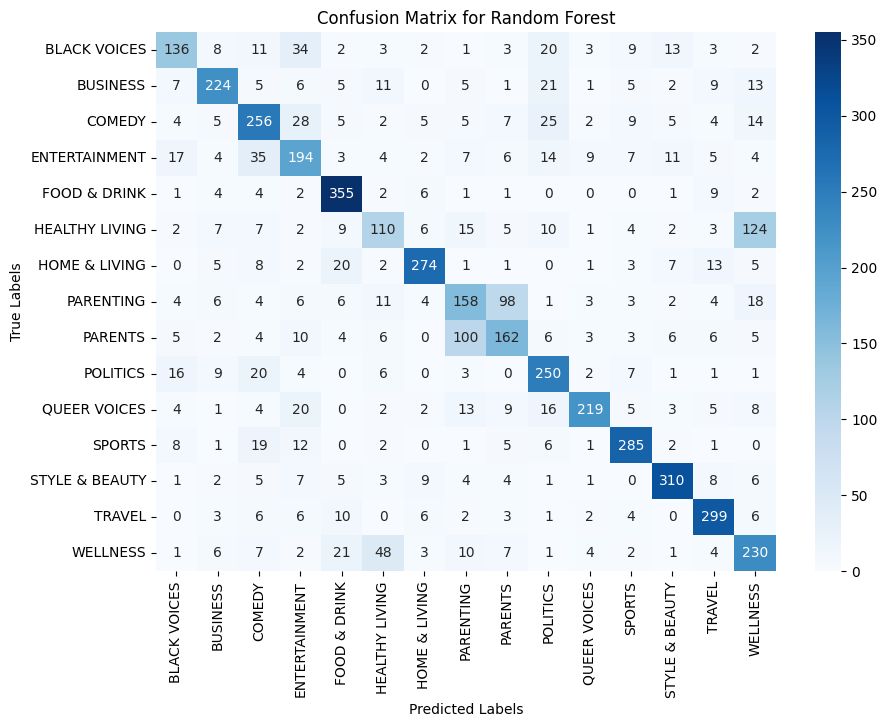

Confusion Matrix for XGBoost


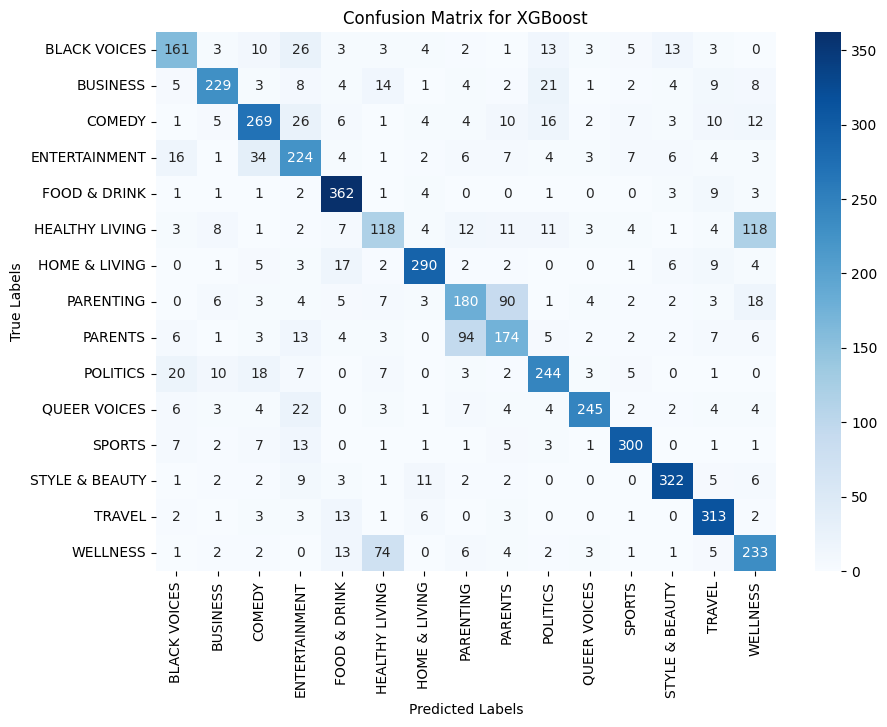

Confusion Matrix for KNN


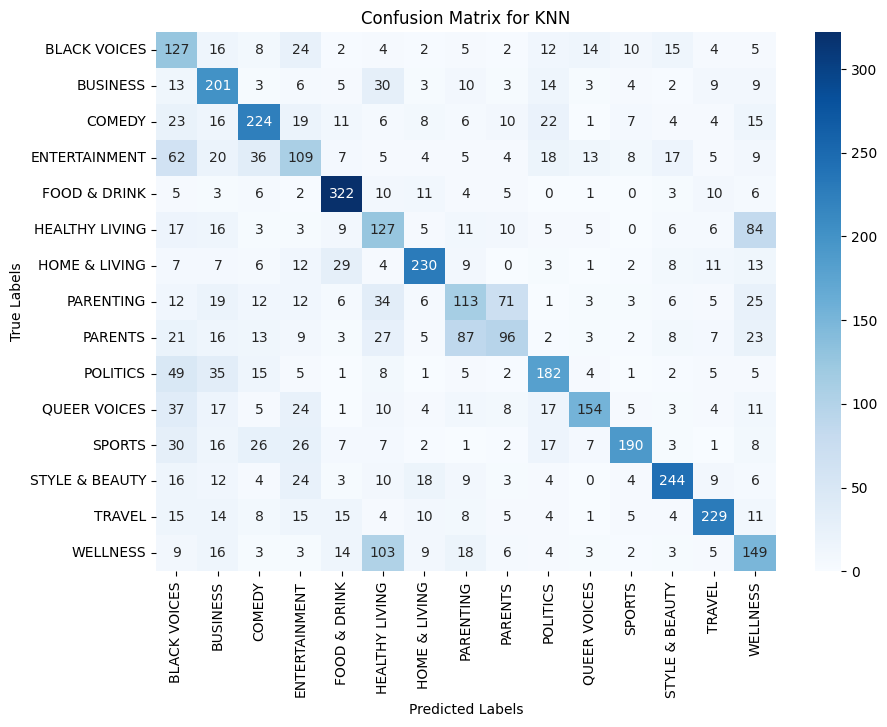

Confusion Matrix for ANN


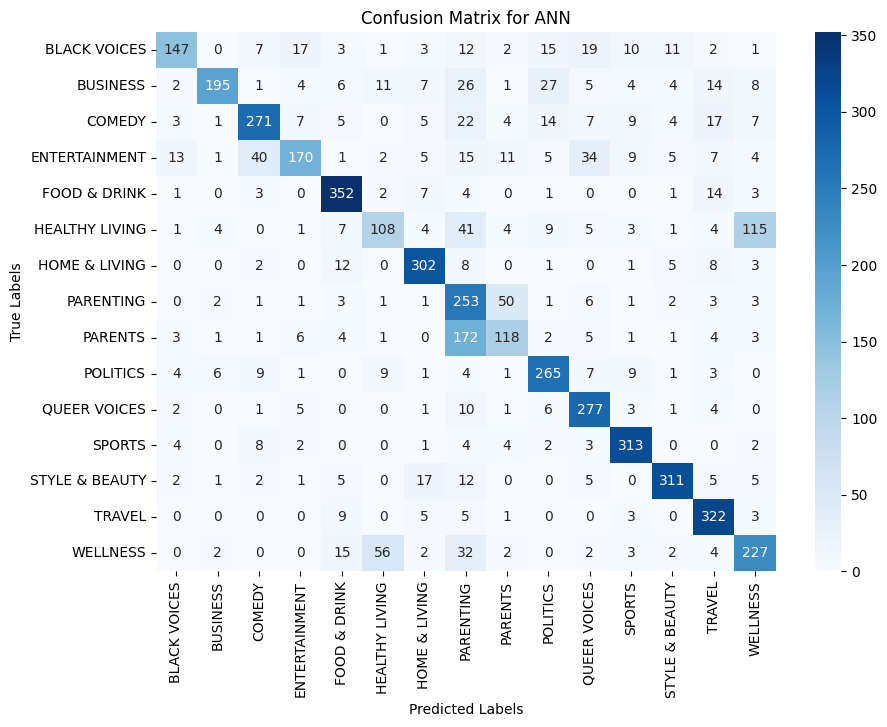

Confusion Matrix for Naive Bayes


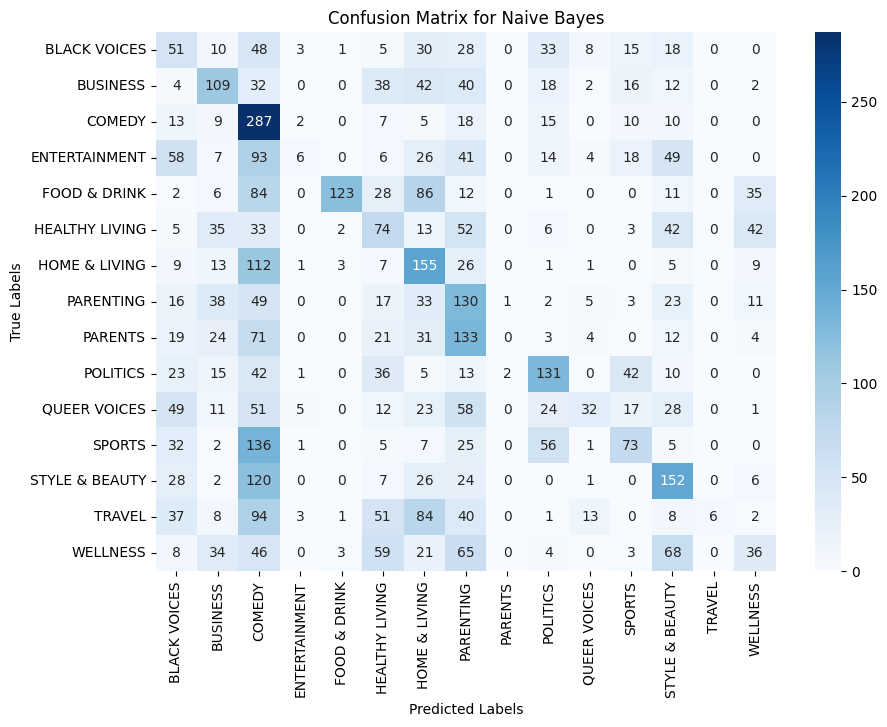

Confusion Matrix for Extra Trees


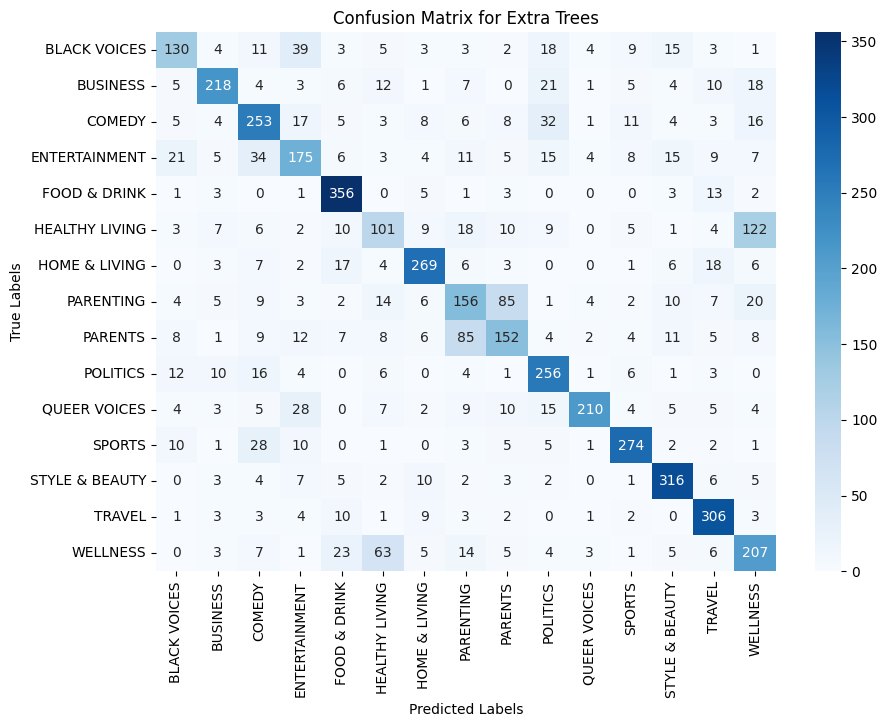

Confusion Matrix for LightGBM


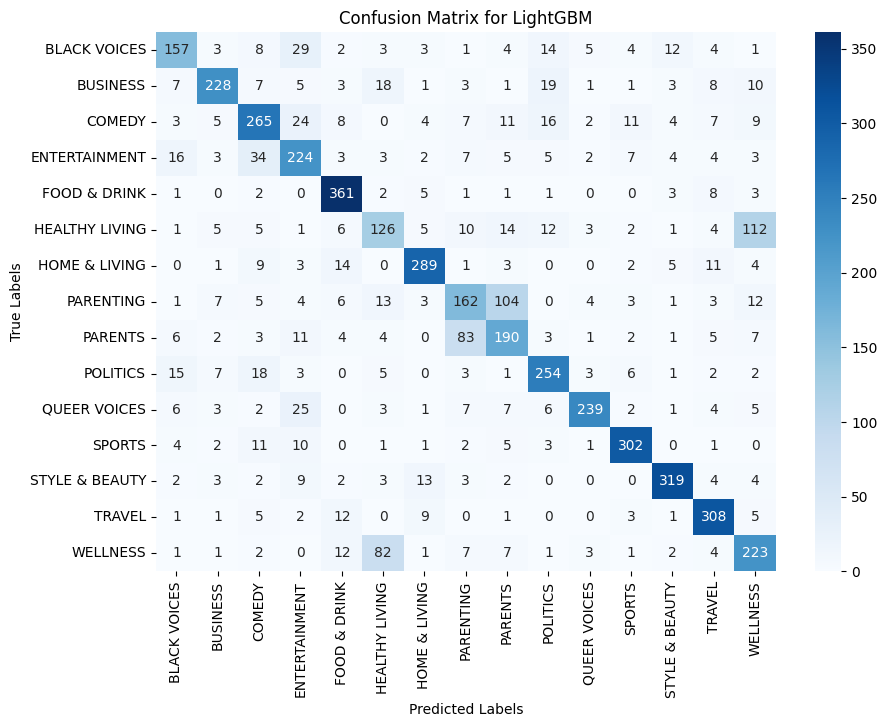

Confusion Matrix for CatBoost


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


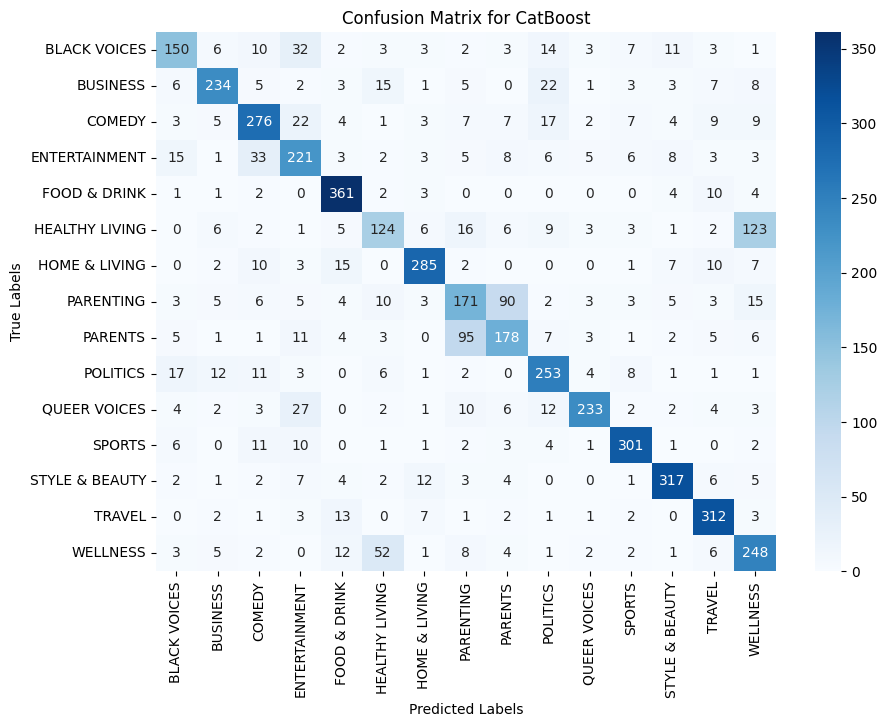

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for AdaBoost


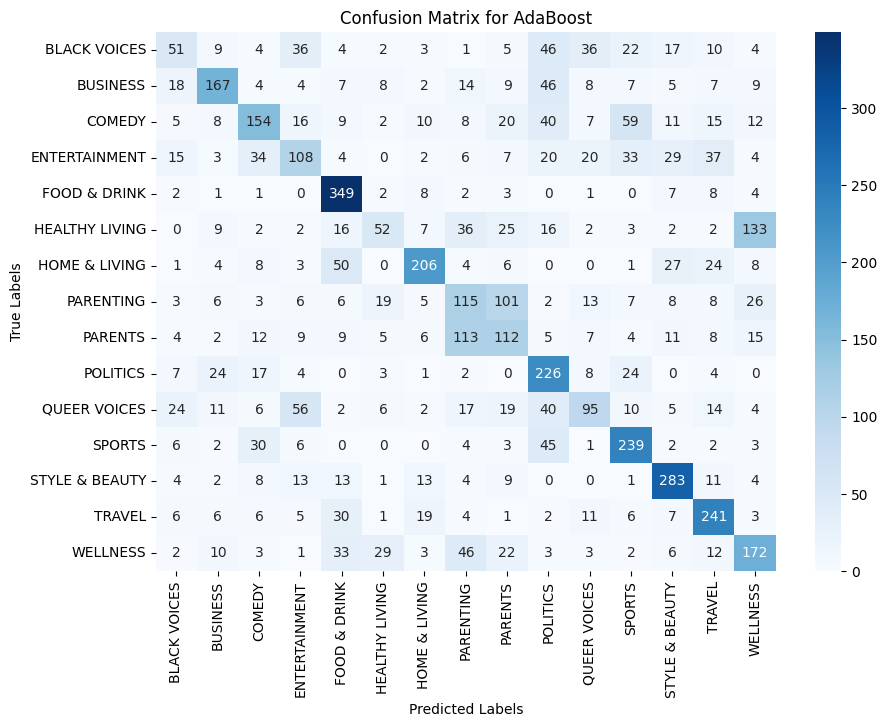

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

def plot_confusion_matrix(y_true, y_pred, model_name, label_encoder, save_path="cm_plots"):
    y_true_decoded = label_encoder.inverse_transform(y_true)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    cm = confusion_matrix(y_true_decoded, y_pred_decoded)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    plot_filename = os.path.join(save_path, f"{model_name}_confusion_matrix.png")
    plt.savefig(plot_filename)

    plt.show()

    plt.close()

for model_name, result in results.items():
    print(f"Confusion Matrix for {model_name}")
    plot_confusion_matrix(Y_test_encoded, result['Prediction'], model_name, label_encoder, save_path="/content/drive/My Drive/ML project/")

    cm = confusion_matrix(label_encoder.inverse_transform(Y_test_encoded), label_encoder.inverse_transform(result['Prediction']))
    # print(cm)
